# Set up the environment

In [1]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn
from sklearn.manifold import TSNE, MDS

# Define a function to create a filename


In [2]:
def getFileName(name, n_samples, model_name, layer_name):
    return name \
        + "_{}_".format(n_samples) \
        + "_{}_".format(model_name) \
        + "_{}".format(layer_name)  \
        + ".npy"   

# Get the model and layers' names and load the model RDM

In [3]:
#one or two models
multiple_models = 1 #one is multiple models, 0 is not
#load the np file containing the shape of the activations
ROOT_PATH = '/mnt/raid/ni/agnessa/RSA/'
NR_OF_SAMPLES = 10000
json_file_layers=os.path.join(ROOT_PATH,'resnets_selected_layers.json')
with open(json_file_layers, "r") as fd:
    selected_layers = json.load(fd)

#get the name of the model(s) and of the layers
num_layers_1 = 33
model_begin_1 = 32 #index of the first layer of the desired model
model_name_1 = selected_layers[model_begin_1].get('model')
layer_names_1 = []

if multiple_models == 1:
    num_layers_2 = 16
    model_begin_2 = 16
    model_name_2 = selected_layers[model_begin_2].get('model')
    layer_names_2 = []

#append the layers from the first model
for i in range(num_layers_1):
    layer_names_1.append(selected_layers[model_begin_1+i].get('layer'))   
    
#append the layers from the second model
if multiple_models == 1:
    for j in range(num_layers_2):
        layer_names_2.append(selected_layers[model_begin_2+j].get('layer'))
    
#Load the model RDM
layer_name_model_rdm = 'all'
if multiple_models == 1:
    model_name = model_name_1 + '_' + model_name_2
elif multiple_models == 0:
    model_name = model_name_1

#Load the model rdm(s)
path = os.path.join(ROOT_PATH + 'Model_RDM/', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name_model_rdm))
Model_RDM = np.load(path)
print('Loaded model ',model_name)

Loaded model  resnext101_32x8d_resnet50


# Plot the Model RDM


Plotting Model RDM for model ->  resnext101_32x8d_resnet50


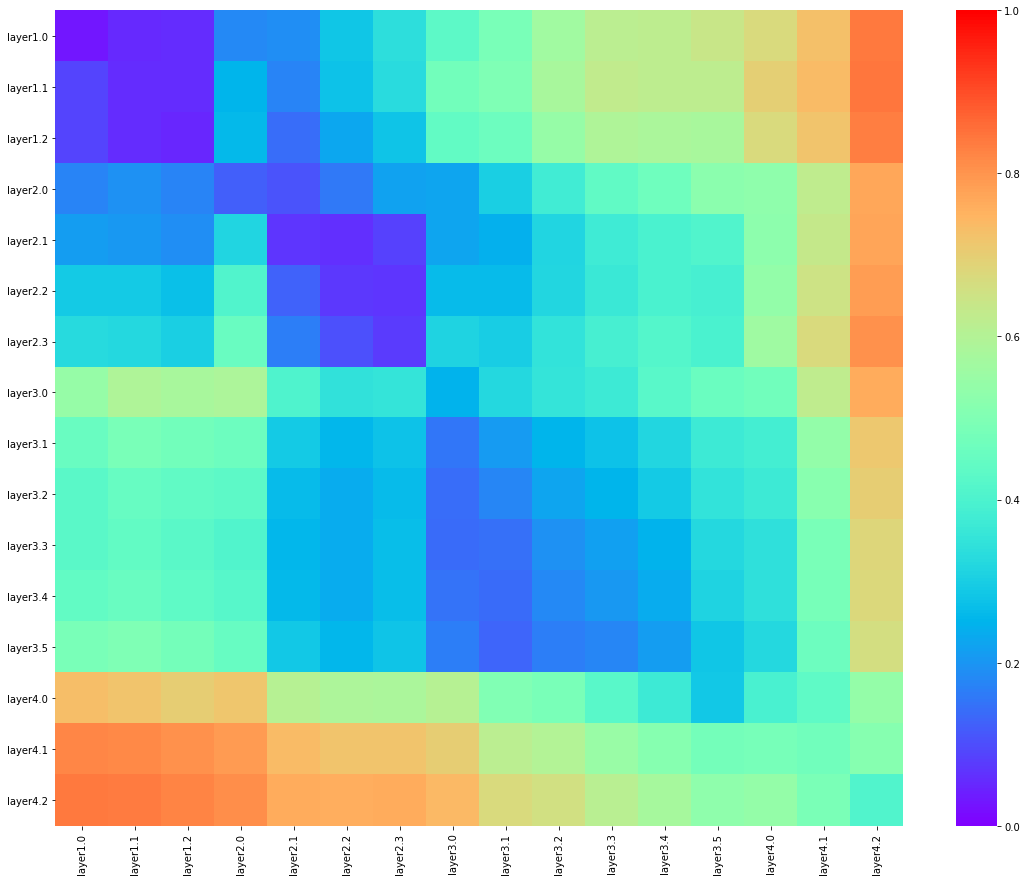

In [6]:
print("Plotting Model RDM for model -> ", model_name)
Model_RDM[np.isnan(Model_RDM)]=0.0 
fig = plt.figure(figsize=(19,15))
a = np.arange(13)
b = np.arange(30,33)
c = np.concatenate((a,b),axis=0)
plot_model = Model_RDM[c,0:16]
ax = seaborn.heatmap(plot_model, xticklabels = layer_names_2, yticklabels = layer_names_2, cmap='rainbow', vmin=0.0, vmax=1.0)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.show()

# Save as a .png file

In [7]:
path = os.path.join(ROOT_PATH + 'Model_RDM_plots', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name_model_rdm) + '.png')
fig.savefig(path)

# Plot stitched model

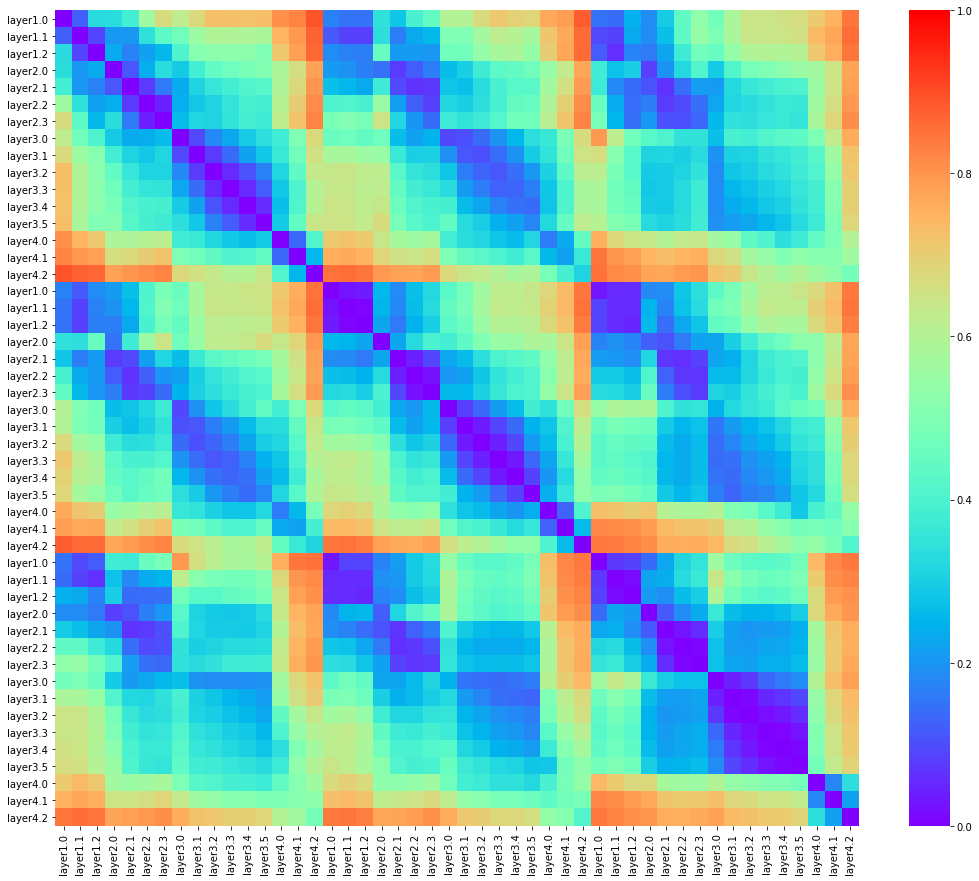

In [55]:
#Load the model rdms
path_34 = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnet34__all.npy'
path_50 = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnet50__all.npy'
path_34_50 = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnet34_resnet50__all.npy'
path_34_resnext = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnext101_32x8d_resnet34__all.npy'
path_50_resnext = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnext101_32x8d_resnet50__all.npy'
path_resnext = '/mnt/raid/ni/agnessa/RSA/Model_RDM/Model_RDM_10000__resnext101_32x8d__all.npy'

model_rdm_34 = np.load(path_34)
model_rdm_50 = np.load(path_50)
model_rdm_34_50 = np.load(path_34_50)
model_rdm_34_resnext = np.load(path_34_resnext)
model_rdm_50_resnext = np.load(path_50_resnext)
model_rdm_resnext = np.load(path_resnext)

#take the same layers of resnext as in the resnets
a = np.arange(13)
b = np.arange(30,33)
c = np.concatenate((a,b),axis=0)
model_resized_rows = model_rdm_resnext[c,:]
model_rdm_resnext_resized = model_resized_rows[:,c]

stitched_rdm = np.ones([48,48])
stitched_rdm[:] = np.nan
stitched_rdm[0:16,0:16] = model_rdm_34
stitched_rdm[0:16,16:32] = model_rdm_34_50
stitched_rdm[16:32,0:16] = np.transpose(model_rdm_34_50)
stitched_rdm[16:32,16:32] = model_rdm_50
stitched_rdm[0:16,32:48] = model_rdm_34_resnext[c,0:16]
stitched_rdm[16:32,32:48] = model_rdm_50_resnext[c,0:16]
stitched_rdm[32:48,32:48] = model_rdm_resnext[c,c]
stitched_rdm[32:48,0:16] = np.transpose(model_rdm_34_resnext[c,0:16])
stitched_rdm[32:48,16:32] = np.transpose(model_rdm_50_resnext[c,0:16])
stitched_rdm[32:48,32:48] = model_rdm_resnext_resized

layer_names_list = ['layer1.0','layer1.1','layer1.2','layer2.0','layer2.1','layer2.2','layer2.3','layer3.0','layer3.1','layer3.2','layer3.3','layer3.4','layer3.5','layer4.0','layer4.1','layer4.2']
layer_names = layer_names_list*3

fig = plt.figure(figsize=(18,15))
ax = seaborn.heatmap(stitched_rdm,  xticklabels = layer_names, yticklabels = layer_names, cmap='rainbow', vmin=0.0, vmax=1.0)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.show()

In [56]:
model_name = 'resnet34_resnet50_resnext'
path = os.path.join(ROOT_PATH + 'Model_RDM_plots', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name_model_rdm) + '.png')
fig.savefig(path)

In [61]:
path_stiched = os.path.join(ROOT_PATH + 'Model_RDM_plots', getFileName("Model_RDM_stitched",NR_OF_SAMPLES,model_name,layer_name_model_rdm))
np.save(path,stitched_rdm)

# Multidimensional scaling

In [57]:
mds = MDS(n_components=2, n_init=200, max_iter=2000, eps=0.0001, dissimilarity='precomputed')
data_embedded = mds.fit_transform(stitched_rdm)

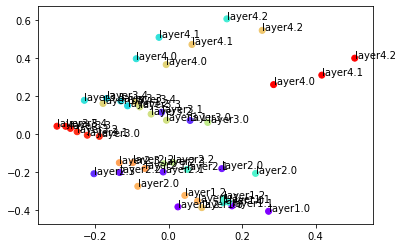

In [58]:
#automate the layers
sorted_layers = np.repeat([1.0,1.1,1.2,2.0,2.1,2.2,2.3,3.0,3.1,3.2,3.3,3.4,3.5,4.0,4.1,4.2],3)
fig, ax = plt.subplots()
sc = ax.scatter(data_embedded[:, 0], data_embedded[:, 1], c=sorted_layers, cmap = 'rainbow')

for i in range(np.array(layer_names).shape[0]):
    ax.annotate(layer_names[i], (data_embedded[i, 0], data_embedded[i, 1]))

plt.show()

In [62]:
path = os.path.join(ROOT_PATH + 'Model_RDM_MDS', getFileName("Model_RDM_MDS",NR_OF_SAMPLES,model_name,layer_name_model_rdm) + '.png')
fig.savefig(path)